In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.00025, optimizer='nadam', loss='huber', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 128.02017
epoch  1 --- Loss --- 126.69445
epoch  2 --- Loss --- 125.35825
epoch  3 --- Loss --- 124.01794
epoch  4 --- Loss --- 122.673904
epoch  5 --- Loss --- 121.32614
epoch  6 --- Loss --- 119.97466
epoch  7 --- Loss --- 118.61971
epoch  8 --- Loss --- 117.26166
epoch  9 --- Loss --- 115.90093
epoch  10 --- Loss --- 114.53797
epoch  11 --- Loss --- 113.17321
epoch  12 --- Loss --- 111.807014
epoch  13 --- Loss --- 110.43973
epoch  14 --- Loss --- 109.071625
epoch  15 --- Loss --- 107.70292
epoch  16 --- Loss --- 106.33377
epoch  17 --- Loss --- 104.965416
epoch  18 --- Loss --- 103.619225
epoch  19 --- Loss --- 102.291916
epoch  20 --- Loss --- 100.97351
epoch  21 --- Loss --- 99.67705
epoch  22 --- Loss --- 98.38888
epoch  23 --- Loss --- 97.09989
epoch  24 --- Loss --- 95.809975
epoch  25 --- Loss --- 94.51899
epoch  26 --- Loss --- 93.22686
epoch  27 --- Loss --- 91.93872
epoch  28 --- Loss --- 90.726814
epoch  29 --- Loss --- 89.54291
epoch  30 --- Loss --

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 147.86412167946497 minutes


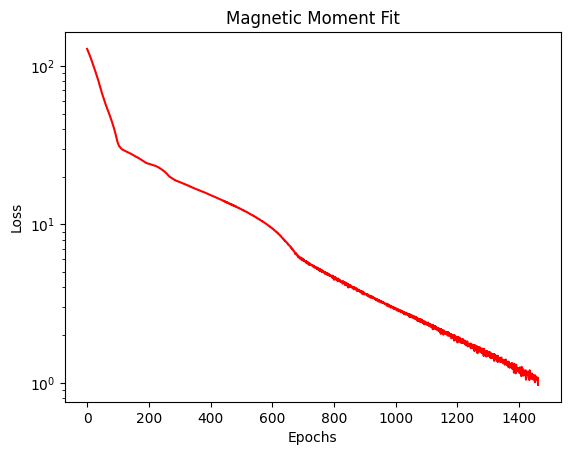

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.505785   -0.01275105 -0.00927108]]
Value:     [[0.9498957  0.07418201 0.06144226]]
---- Moment  1 -----
Position:  [[ 0.00361915  0.27260387 -0.01648893]]
Value:     [[-0.09457716  1.7321913   0.28695667]]
---- Moment  2 -----
Position:  [[-0.02202058 -0.03010703  0.16274823]]
Value:     [[0.13190794 0.1400997  2.6316335 ]]
